<a href="https://colab.research.google.com/github/junyeon-no/spam_app/blob/master/spammail_filter_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#데이터 가져오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
# data = pd.read_csv('spam.csv',encoding='latin1')

# data = pd.read_csv('./spam_ham_dataset.csv',encoding='utf-8')

data = pd.read_csv('./sample_data/spam_ko_utf8_csv.csv',encoding='utf-8')
# data = pd.read_csv('./new.csv',encoding='latin1')
# data = pd.read_csv('./spam_co.csv',engine='python')
# data = pd.read_csv('./spam_co_v2.csv',engine='utf-8')
print(os.getcwd())

/content


In [ ]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 4310


In [ ]:
print(data[:5])

     v1                                                 v2
0  spam          "[Web발신]\n[긴급재난자금] 상품권이 도착했습니다.\n확인해주세요."
1   ham   주롱 지점까지 가세요, 미쳤어 요 .. 부기 스 앤 그레이트 월드 라 e 뷔페에서...
2  spam                                  무료 받아가세요 공짜 프리 확인
3  spam   2 번의 무료 입장권은 FA 컵 결승전 tkts 2005 년 5 월 21 일 우승...
4   ham                U dun 말이 너무 이른 호 ... U c 벌써 ... ,,,


In [ ]:
# del data['Unnamed: 2']
# del data['Unnamed: 3']
# del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]








# del data['Unnamed: 0']
# del data['Unnamed: 0']
# del data['Unnamed: 3']
# del data['Unnamed: 4']
# data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

# data[:5]

,v1,v2
0,1,"""[Web발신]\n[긴급재난자금] 상품권이 도착했습니다.\n확인해주세요."""
1,0,"주롱 지점까지 가세요, 미쳤어 요 .. 부기 스 앤 그레이트 월드 라 e 뷔페에서..."
2,1,무료 받아가세요 공짜 프리 확인
3,1,2 번의 무료 입장권은 FA 컵 결승전 tkts 2005 년 5 월 21 일 우승...
4,0,"U dun 말이 너무 이른 호 ... U c 벌써 ... ,,,"


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      4310 non-null   int64 
 1   v2      4310 non-null   object
dtypes: int64(1), object(1)
memory usage: 67.5+ KB


In [ ]:
data.isnull().values.any()


False

In [ ]:
data['v2'].nunique(), data['v1'].nunique()


(4027, 2)

In [ ]:
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거


In [ ]:
print('총 샘플의 수 :',len(data))


총 샘플의 수 : 4027


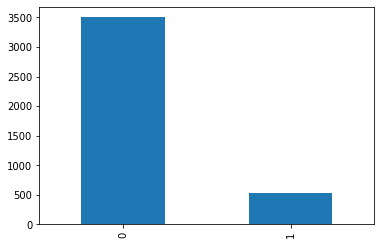

In [ ]:
data['v1'].value_counts().plot(kind='bar');


In [ ]:
print(data.groupby('v1').size().reset_index(name='count'))


   v1  count
0   0   3502
1   1    525


In [ ]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

print(X_data)


메일 본문의 개수: 4027
레이블의 개수: 4027
0               "[Web발신]\n[긴급재난자금] 상품권이 도착했습니다.\n확인해주세요."
1        주롱 지점까지 가세요, 미쳤어 요 .. 부기 스 앤 그레이트 월드 라 e 뷔페에서...
2                                       무료 받아가세요 공짜 프리 확인
3        2 번의 무료 입장권은 FA 컵 결승전 tkts 2005 년 5 월 21 일 우승...
4                     U dun 말이 너무 이른 호 ... U c 벌써 ... ,,,
                              ...                        
4305           나는 내 선반에 10 rs를 보관합니다 :) 계란 두 개를 사십시오. ,,,
4306      내가 몸이 좋지 않았어 자기, 목에 땀샘이 부어 있었어 ... 뭘하게 된거 야?,,,
4307     ur changes 2 da report 큰가요? 이전 보고서에서 이미 변경했습니...
4308                                캡틴이 우리 방에 있습니다 :) ,,,
4309     말할 수 없습니다. bcaz 모바일에 문제가 있습니다.들을 수 있지만 내 목소리를...
Name: v2, Length: 4027, dtype: object


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장
print(sequences) #[ [ 33 , 33, 33] ]

[[5073, 5074, 2973, 1106, 2974], [5075, 5076, 2975, 1621, 155, 1622, 963, 5077, 2976, 5078, 840, 164, 5079, 1308, 2115, 5080, 322, 24, 65, 2116], [21, 5081, 5082, 2977, 442], [2, 841, 21, 5083, 5084, 5085, 5086, 5087, 2978, 247, 90, 132, 1309, 107, 5088, 25, 198, 5089, 1107, 964, 517, 5090, 5091, 101, 965, 31, 476, 112, 966, 1108, 5092, 412], [6, 282, 765, 39, 1310, 5093, 6, 113, 156], [122, 165, 2979, 356, 199, 34, 967, 47, 248, 1311, 2117], [569, 63, 54, 48, 2118, 5094, 443, 1623, 192, 41, 2119, 1624, 2120, 136, 283, 2121, 5095, 40, 842, 15, 149, 40, 5096], [5097, 444, 1109, 388, 56, 133, 27, 5098, 5099, 5100], [150, 2122, 375, 5101, 5102, 2980, 5103, 5104, 5105, 2981, 18, 2982, 74, 518, 5106, 2983, 2984, 2985, 226, 2986], [2987, 2123, 519, 1312, 968, 50, 5107, 3, 445, 1625, 621, 5108, 67, 357, 389, 5109, 215, 57, 120, 51, 446], [2124, 477, 390, 166, 2125, 1313, 5110, 83, 266, 843, 1110, 198, 682, 7, 3, 1, 5111, 134, 682, 2126, 198, 67], [143, 58, 391, 22, 5112, 5113, 24, 5114, 388, 

In [ ]:
print(sequences[:5])


[[5073, 5074, 2973, 1106, 2974], [5075, 5076, 2975, 1621, 155, 1622, 963, 5077, 2976, 5078, 840, 164, 5079, 1308, 2115, 5080, 322, 24, 65, 2116], [21, 5081, 5082, 2977, 442], [2, 841, 21, 5083, 5084, 5085, 5086, 5087, 2978, 247, 90, 132, 1309, 107, 5088, 25, 198, 5089, 1107, 964, 517, 5090, 5091, 101, 965, 31, 476, 112, 966, 1108, 5092, 412], [6, 282, 765, 39, 1310, 5093, 6, 113, 156]]


In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)


{'있습니다': 1, '2': 2, '수': 3, '나는': 4, '내': 5, 'u': 6, '할': 7, '내가': 8, 'lt': 9, 'gt': 10, '지금': 11, '4': 12, '당신이': 13, '것입니다': 14, '1': 15, '당신은': 16, '전화': 17, '모든': 18, '좋은': 19, '또는': 20, '무료': 21, '오늘': 22, '당신의': 23, '더': 24, '위해': 25, '난': 26, '나를': 27, 'ur': 28, '없습니다': 29, '한': 30, 'txt': 31, '그': 32, '하지만': 33, '것': 34, '때': 35, '것을': 36, '우리는': 37, '당신을': 38, '너무': 39, 'to': 40, '아직': 41, '해요': 42, '그리고': 43, 'k': 44, 'i': 45, '그럼': 46, '그는': 47, '3': 48, '그래서': 49, '개의': 50, '만': 51, '어떻게': 52, '있습니까': 53, '이제': 54, '안녕하세요': 55, '않습니다': 56, '시간': 57, '집에': 58, '다시': 59, '잘': 60, '오': 61, '그래': 62, '안녕': 63, '대해': 64, '많은': 65, '정말': 66, '전화하십시오': 67, '알았어': 68, 'www': 69, '이': 70, '다른': 71, 'u는': 72, '네': 73, '대한': 74, '다': 75, '감사합니다': 76, '사랑': 77, 'n': 78, '그녀는': 79, '메시지를': 80, '내일': 81, '우리가': 82, '함께': 83, '및': 84, '그냥': 85, '저는': 86, '나중에': 87, '전화하세요': 88, '분': 89, '5': 90, '우리': 91, '있어요': 92, '죄송합니다': 93, '전화를': 94, '좋아': 95, '예': 96, '나': 97, '나에게': 98, 'lor': 99,

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


등장 빈도가 1번 이하인 희귀 단어의 수: 9716
단어 집합(vocabulary)에서 희귀 단어의 비율: 65.70192047606167
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 20.43924604510266


In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))


단어 집합의 크기: 14789


In [ ]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)



훈련 데이터의 개수 : 3221
테스트 데이터의 개수: 806


메일의 최대 길이 : 136
메일의 평균 길이 : 11.804321


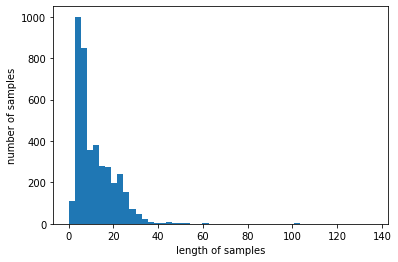

In [ ]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [ ]:
max_len = 189
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)


훈련 데이터의 크기(shape):  (4027, 189)


In [ ]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장

y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras.layers import LSTM


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
# model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2)
# print("\n 학습한 데이터 정확도",model.evaluate(X_train, y_train)[1])
# print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))
# print("---------------------------------------------------------")
# history = model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)
# print("\n 학습한 데이터 정확도",model.evaluate(X_train, y_train)[1])
# print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))
# print("---------------------------------------------------------")
# history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
# print("\n 학습한 데이터 정확도",model.evaluate(X_train, y_train)[1])
# print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))
# print("---------------------------------------------------------")
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)
# print("\n 학습한 데이터 정확도",model.evaluate(X_train, y_train)[1])
# print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))
# print("---------------------------------------------------------")


Epoch 1/4
41/41 [==============================] - 9s 28ms/step - loss: 0.4757 - acc: 0.8164 - val_loss: 0.2082 - val_acc: 0.8992
Epoch 2/4
41/41 [==============================] - 1s 14ms/step - loss: 0.1994 - acc: 0.9191 - val_loss: 0.1409 - val_acc: 0.9628
Epoch 3/4
41/41 [==============================] - 1s 14ms/step - loss: 0.0946 - acc: 0.9811 - val_loss: 0.1096 - val_acc: 0.9721
Epoch 4/4
41/41 [==============================] - 1s 14ms/step - loss: 0.0505 - acc: 0.9898 - val_loss: 0.0799 - val_acc: 0.9829


In [ ]:

print(history.history)

{'loss': [0.3650828003883362, 0.17172478139400482, 0.09025157988071442, 0.046590790152549744], 'acc': [0.8548136353492737, 0.9413819909095764, 0.9821428656578064, 0.9906832575798035], 'val_loss': [0.20817391574382782, 0.14093637466430664, 0.10964623838663101, 0.07987900078296661], 'val_acc': [0.8992248177528381, 0.9627906680107117, 0.9720930457115173, 0.9829457402229309]}


In [ ]:
print("\n 학습한 데이터 정확도",model.evaluate(X_train, y_train)[1])

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))
print(model.evaluate(X_test, y_test, return_dict=True))




101/101 [==============================] - 1s 5ms/step - loss: 0.0380 - acc: 0.9919

 학습한 데이터 정확도 0.991927981376648
26/26 [==============================] - 0s 5ms/step - loss: 0.0613 - acc: 0.9839

 테스트 정확도: 0.9839
26/26 [==============================] - 0s 5ms/step - loss: 0.0613 - acc: 0.9839
{'loss': 0.061298370361328125, 'acc': 0.9838709831237793}


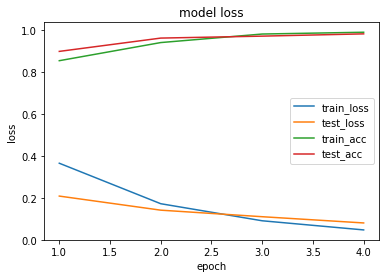

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss', 'train_acc', 'test_acc'], loc='center right')
plt.show()

In [ ]:
d = ["""
[Web발신]
[긴급재난자금] 상품권이 도착했습니다.
확인해주세요. https://bit.ly/3aSTMel
"""]
s = tokenizer.texts_to_sequences(d) # 단어를 숫자값, 인덱스로 변환하여 저장
print(s) #[ [ 33 , 33, 33] ]
X_data = s
data = pad_sequences(X_data, maxlen = max_len)
print(data)
print(model.predict(data))

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
# sequences = tokenizer.texts_to_sequences(data) # 단어를 숫자값, 인덱스로 변환하여 저장
# X_data = sequences
# data = pad_sequences(X_data, maxlen = max_len)
# print(data)
# print(model.predict(data))

[[5073, 5074, 2973, 1106, 2974, 3296]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 5073 5074 2973 110

In [ ]:


result = model.predict(X_test[:100])
print(X_test.shape)
print(result[1])
print(result.shape)
result = model.predict(X_test[:1])


(806, 189)
[0.9204484]
(100, 1)


In [ ]:
print(X_test[:1])
print('------------------------------------------------------------------------')
print(X_test[0])

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [ ]:
count = 0#14,35,
for i in y_test:
  if i == 1:
    print('c = ', count)
    print(i)
  count+=1
  

c =  0
1
c =  1
1
c =  2
1
c =  10
1
c =  19
1
c =  20
1
c =  34
1
c =  37
1
c =  54
1
c =  63
1
c =  64
1
c =  69
1
c =  96
1
c =  97
1
c =  114
1
c =  121
1
c =  125
1
c =  127
1
c =  129
1
c =  133
1
c =  136
1
c =  139
1
c =  150
1
c =  157
1
c =  160
1
c =  181
1
c =  189
1
c =  197
1
c =  200
1
c =  204
1
c =  235
1
c =  251
1
c =  271
1
c =  276
1
c =  290
1
c =  298
1
c =  310
1
c =  320
1
c =  322
1
c =  330
1
c =  333
1
c =  341
1
c =  347
1
c =  359
1
c =  368
1
c =  393
1
c =  397
1
c =  399
1
c =  401
1
c =  420
1
c =  426
1
c =  428
1
c =  430
1
c =  432
1
c =  438
1
c =  439
1
c =  452
1
c =  472
1
c =  483
1
c =  491
1
c =  495
1
c =  499
1
c =  507
1
c =  513
1
c =  516
1
c =  522
1
c =  523
1
c =  525
1
c =  536
1
c =  540
1
c =  556
1
c =  565
1
c =  566
1
c =  578
1
c =  579
1
c =  586
1
c =  587
1
c =  591
1
c =  594
1
c =  602
1
c =  604
1
c =  607
1
c =  618
1
c =  622
1
c =  626
1
c =  640
1
c =  645
1
c =  654
1
c =  659
1
c =  665
1
c =  674
1
c =  689
1
c =  

In [ ]:

model.save('LSTM_model.h5')

In [ ]:
# 2. 모델 불러오기
from keras.models import load_model
load_model = load_model('LSTM_model.h5')

# 3. 모델 사용하기
result = load_model.predict(X_test[:100])
print(X_test.shape)
print(result[1])
print(result.shape)
result = load_model.predict(X_test[:1])

(806, 189)
[0.8775994]
(100, 1)


In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [ ]:
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)